In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#calcul de l'IQR des charges

q1 = np.percentile(data['charges'],25)
q3 = np.percentile(data['charges'],75)

iqr = q3-q1

quartile_deviation = (q3-q1)/2

print(iqr)
print(quartile_deviation)

11899.625365
5949.8126825


In [4]:
data[data['charges']>1.5*q3]

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [5]:
#changement de la colonne smoker en 1(fumeurs) et 0
data['smoker']= data['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [6]:
##changement de la colonne sex en 1(male) et 0(female)
data['sex']= data['sex'].apply(lambda x:1 if x=='male' else 0)

In [7]:
#création de catégorie d'age pour un pandas cut

'''bins = [0,18,25,30,35,40,50,60]
labels=['sous poids','poids normal','surpoids','obésité modérée','obésité sévère','obésité morbide','obésité massive']

data['BMI_cat']=pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

data[data['bmi']>50]'''

data['age'].max()

bins = [age for age in range(15,76,30)]
labels=['jeunes','vieux']
data['tranche age']=pd.cut(data['age'], bins=bins, labels=labels, right=False)
# data['BMI_cat']=pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

data.head()


,age,sex,bmi,children,smoker,region,charges,tranche age
0,19,0,27.900,0,1,southwest,16884.92400,jeunes
1,18,1,33.770,1,0,southeast,1725.55230,jeunes
2,28,1,33.000,3,0,southeast,4449.46200,jeunes
3,33,1,22.705,0,0,northwest,21984.47061,jeunes
4,32,1,28.880,0,0,northwest,3866.85520,jeunes


In [8]:
group_smoker = data.groupby('tranche age')['smoker'].sum().reset_index()


group_age = data.groupby('tranche age')['bmi'].count().reset_index()

part_fumeur = pd.concat([group_smoker,group_age['bmi']], axis=1)

/tmp/ipykernel_10744/3560859510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_smoker = data.groupby('tranche age')['smoker'].sum().reset_index()
/tmp/ipykernel_10744/3560859510.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age = data.groupby('tranche age')['bmi'].count().reset_index()


In [9]:
part_fumeur['smoker_part']=part_fumeur['smoker']/part_fumeur['bmi']*100

In [10]:
part_fumeur

,tranche age,smoker,bmi,smoker_part
0,jeunes,177,809,21.878863
1,vieux,97,529,18.336484


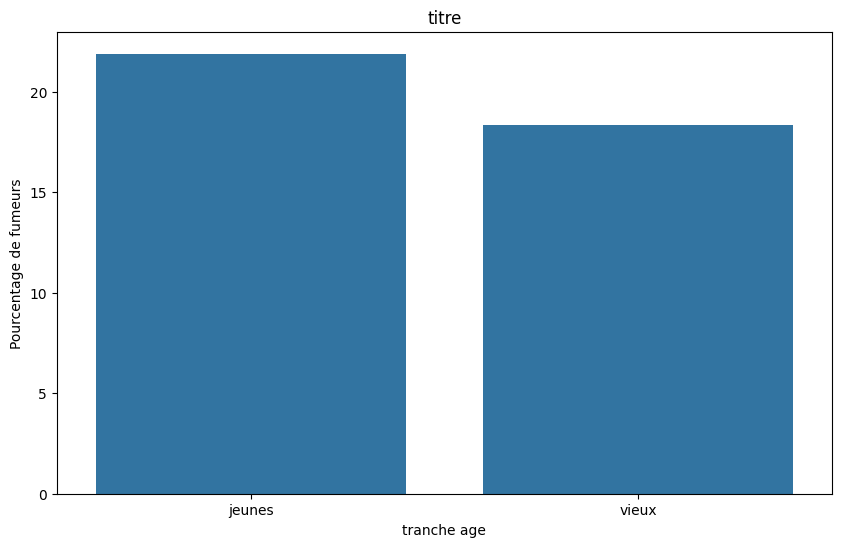

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(part_fumeur,x=part_fumeur['tranche age'],y=part_fumeur['smoker_part'])
plt.title('titre')
plt.ylabel('Pourcentage de fumeurs')
plt.show()

<Axes: >

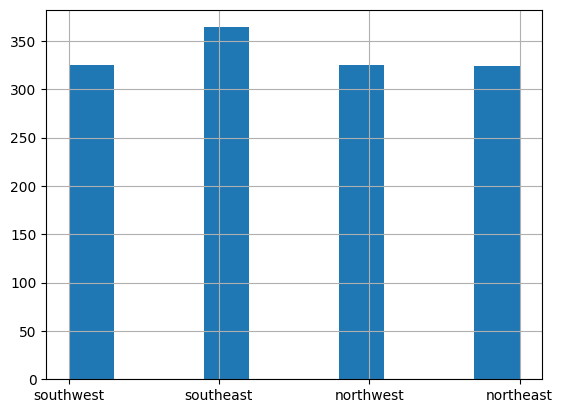

In [12]:
data['region'].hist()

<Axes: xlabel='region', ylabel='charges'>

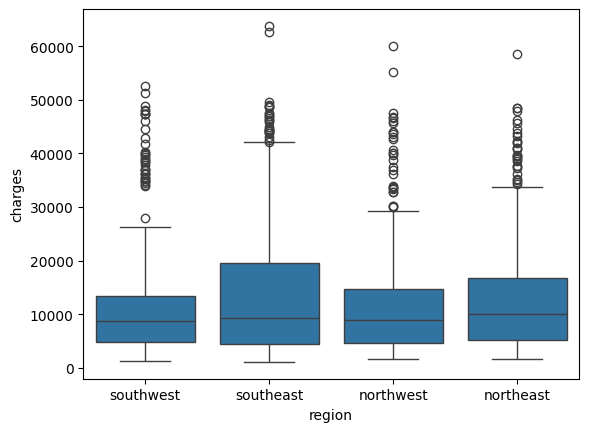

In [13]:
# unique_region = data['region'].unique()
# for region in unique_region:
sns.boxplot(x=data['region'], y=data['charges'])


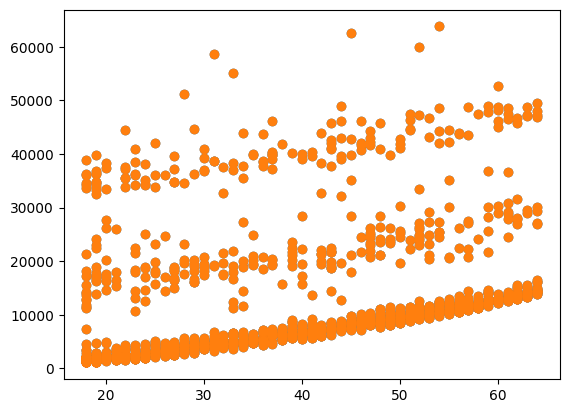

In [14]:
plt.scatter(data[['age']], data[['charges']])
plt.scatter(data[['age']], data[['charges']])
plt.show()

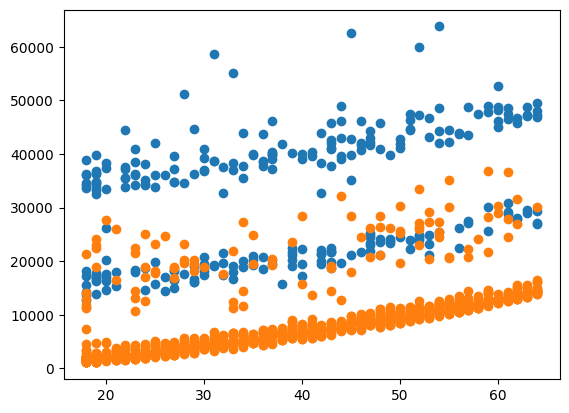

In [15]:
plt.scatter(data[data['smoker']==1][['age']], data[data['smoker']==1][['charges']])
plt.scatter(data[data['smoker']==0][['age']], data[data['smoker']==0][['charges']])
plt.show()

In [16]:
#création d'une colonne par région

unique_region = data['region'].unique()
for region in unique_region:
    data[region]=[1 if line== region else 0 for line in data['region']]
data.head()

,age,sex,bmi,children,smoker,region,charges,tranche age,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,southwest,16884.92400,jeunes,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,jeunes,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,jeunes,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,jeunes,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,jeunes,0,0,1,0


In [17]:
data.head(100)

,age,sex,bmi,children,smoker,region,charges,tranche age,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,southwest,16884.92400,jeunes,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,jeunes,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,jeunes,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,jeunes,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,jeunes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,28,0,37.620,1,0,southeast,3766.88380,jeunes,0,1,0,0
96,54,0,30.800,3,0,southwest,12105.32000,vieux,1,0,0,0
97,55,1,38.280,0,0,southeast,10226.28420,vieux,0,1,0,0
98,56,1,19.950,0,1,northeast,22412.64850,vieux,0,0,0,1


In [18]:
corr = data[['age','sex','bmi','children','smoker','southwest','southeast','northwest','northeast','charges']]
corr = corr.corr()

<Axes: >

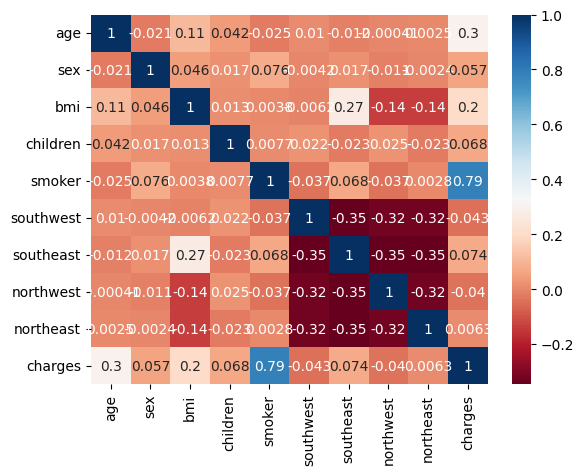

In [19]:
sns.heatmap(corr,cmap="RdBu",cbar=True, annot=True)

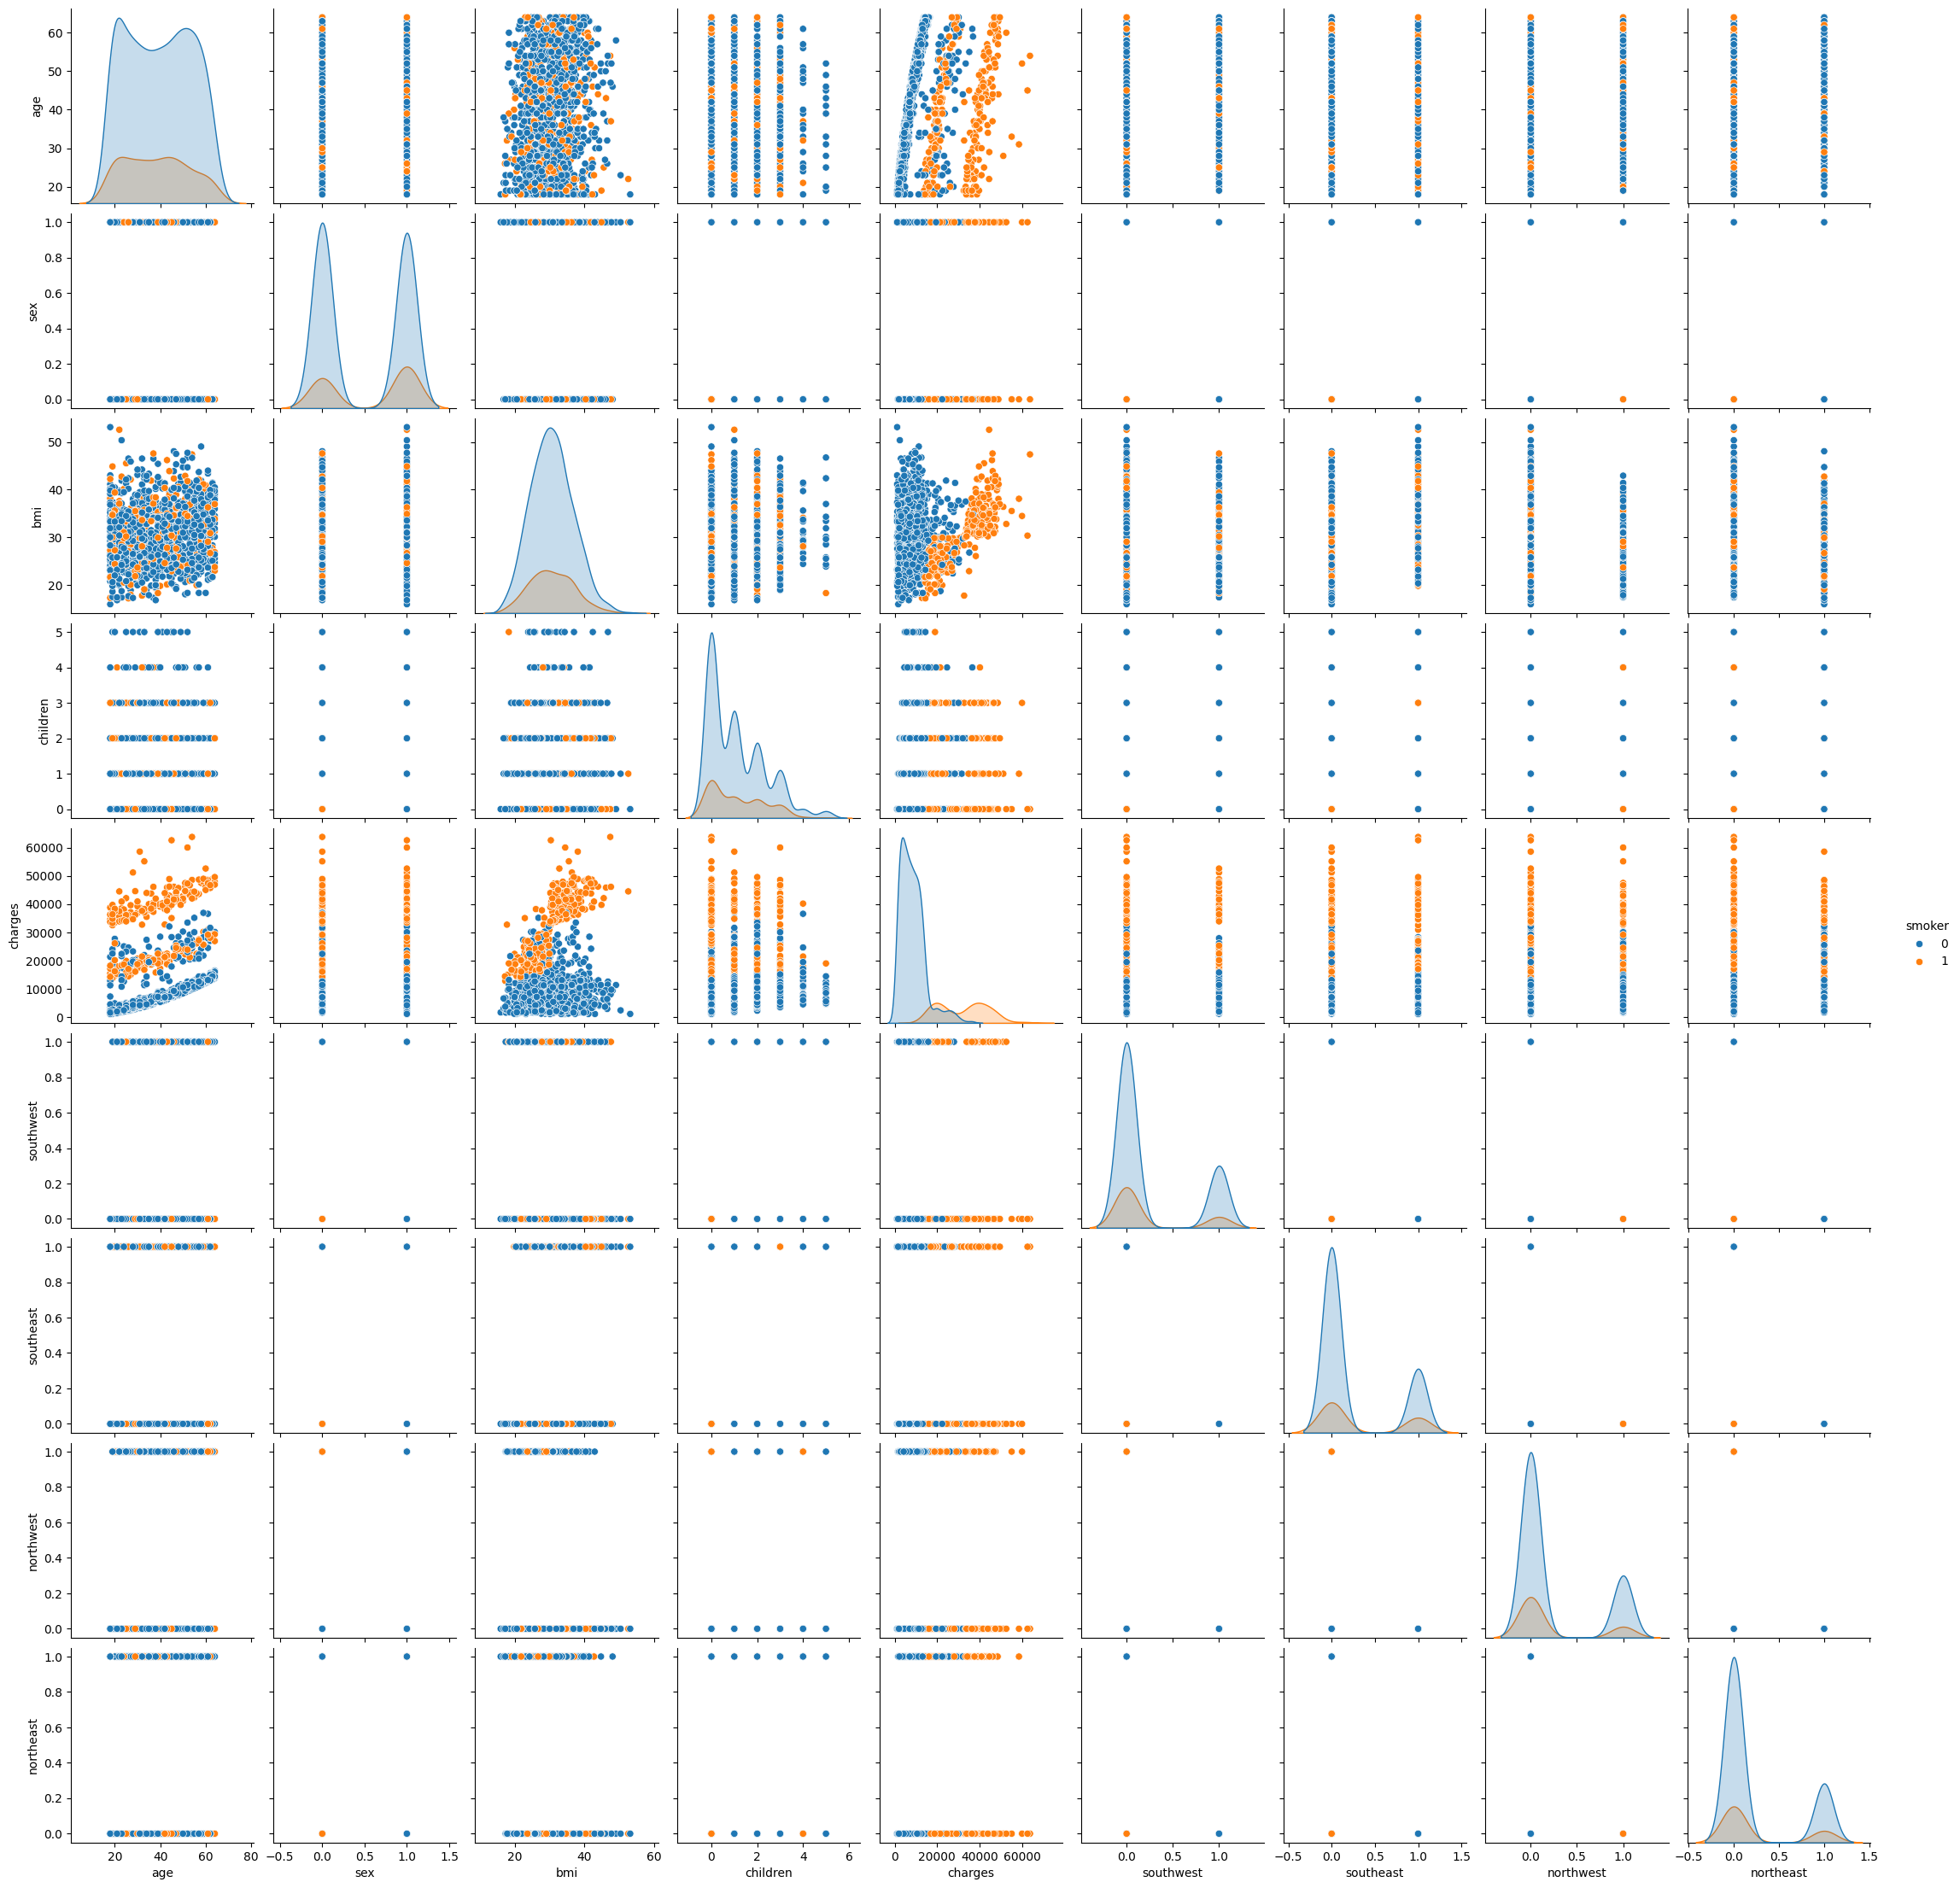

In [20]:
#perplot
sns.pairplot(data, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

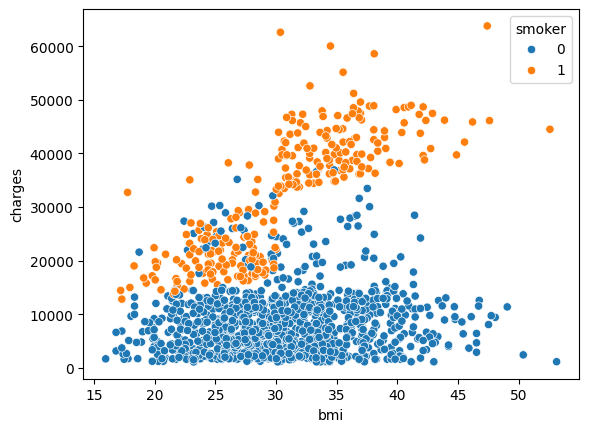

In [21]:
sns.scatterplot(data,x='bmi',y='charges', hue='smoker')

<Axes: xlabel='region', ylabel='age'>

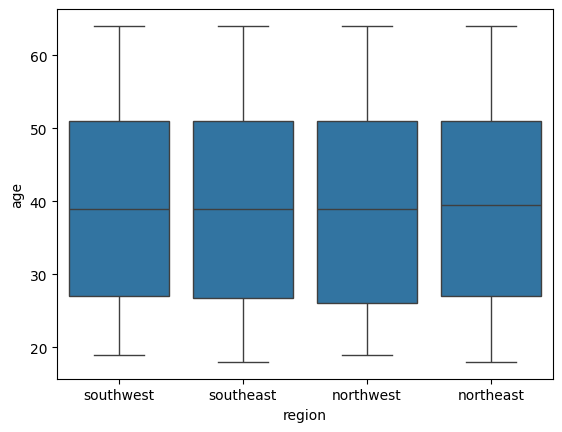

In [22]:
sns.boxplot(x=data['region'], y=data['age'])

In [23]:
for region in unique_region:
    data[data['southwest']==1]['children'].mean()

<Axes: >

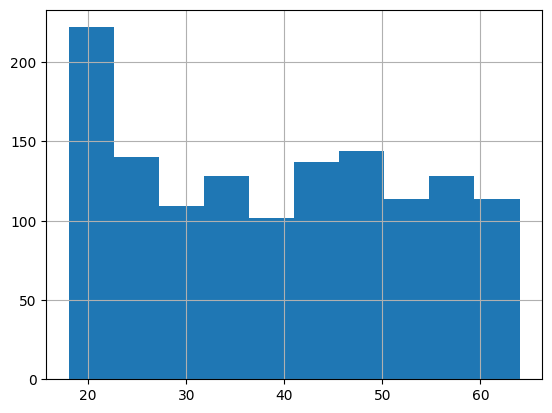

In [24]:
data['age'].hist()

<Axes: >

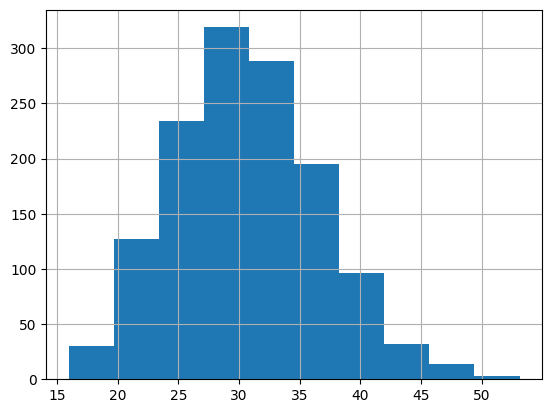

In [25]:
data['bmi'].hist()

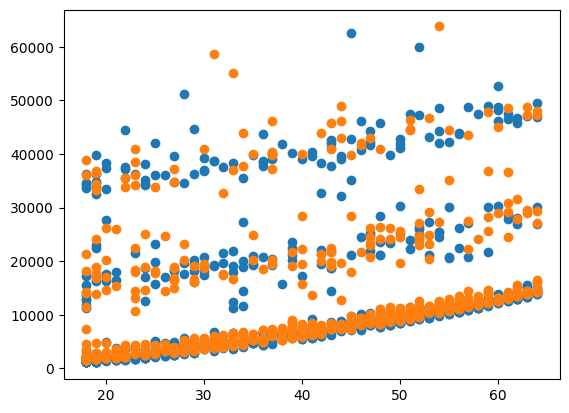

In [26]:
plt.scatter(data[data['sex']==1][['age']], data[data['sex']==1][['charges']])
plt.scatter(data[data['sex']==0][['age']], data[data['sex']==0][['charges']])

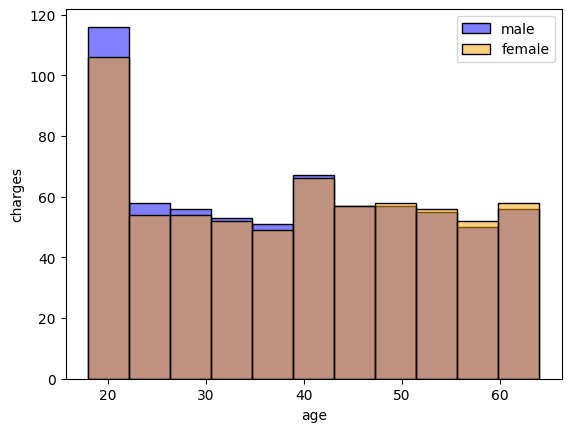

In [27]:
data_male = data[data['sex']==1]
data_female = data[data['sex']==0]

sns.histplot(data=data_male['age'], color='blue', alpha=0.5, label='male')
sns.histplot(data=data_female['age'], color='orange', alpha=0.5, label='female')

# Adding labels and legend
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

plt.show()

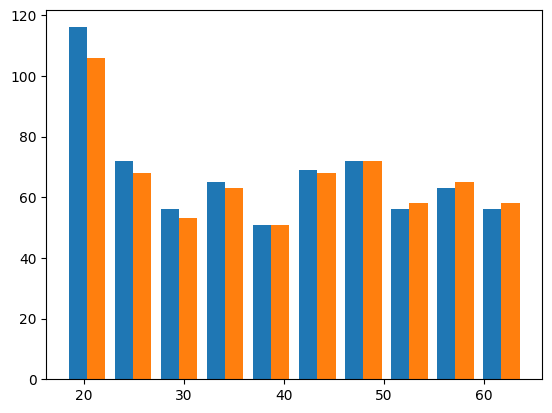

In [32]:
data_male=data[data['sex']==1]
data_female=data[data['sex']==0]
# data_male['age'].hist(color='blue')
# data_female['age'].hist(color='green')
plt.hist([data_male['age'], data_female['age']])
plt.show()

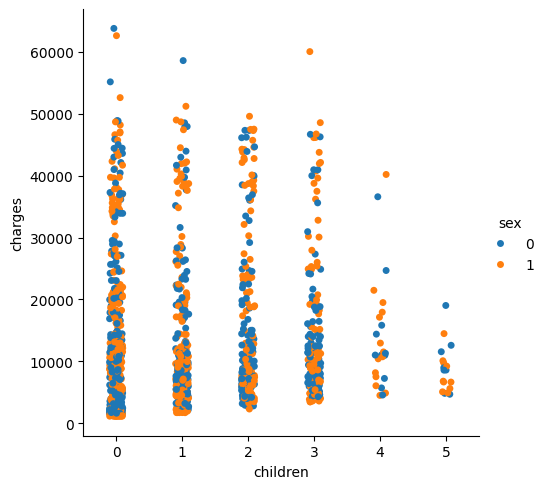

In [29]:
sns.catplot(x='children', y="charges", data=data, hue='sex')

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges,tranche age,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,southwest,16884.92400,jeunes,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,jeunes,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,jeunes,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,jeunes,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,jeunes,0,0,1,0


In [31]:
import scipy.stats as st

print(st.pearsonr(data["charges"],data["bmi"])[0])
print(np.cov(data["charges"],data["bmi"],ddof=0)[1,0])

0.1983409688336289
14636.357263073787
